# **Data Analysis Project: Air Quality Guanyuan**
### Nama : Galih Kuncoro Jati
### Proyek Akhir : Analisis Data
### Kelas : Belajar Analisis Data dengan Python

# **Define Questions**
#### 1. How do PM2.5 levels vary throughout the year?
#### 2. What is the relationship between PM2.5 levels and various weather conditions?

# **Data Wrangling**

## **Gathering Data**

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set_style("whitegrid")

file_path = 'PRSA_Data_Guanyuan_20130301-20170228.csv'
df = pd.read_csv(file_path)


## **Assessing Data**

In [4]:
# Initializing data
initial_assessment = df.head()  # Taking the first few rows of the dataframe
initial_columns = df.columns    # Getting the list of columns in the dataframe
initial_datatypes = df.dtypes  # Getting the data types of each column in the dataframe

# Displaying the results of initial data assessment
print("Initial Assessment (First few rows of the dataframe):")
print(initial_assessment)
print("\nColumns (Dataframe columns):")
print(initial_columns)
print("\nData Types (Data types of each column):")
print(initial_datatypes)



Initial Assessment (First few rows of the dataframe):
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan  

Columns (Dataframe columns):
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

Data Ty

## **Cleaning Data**

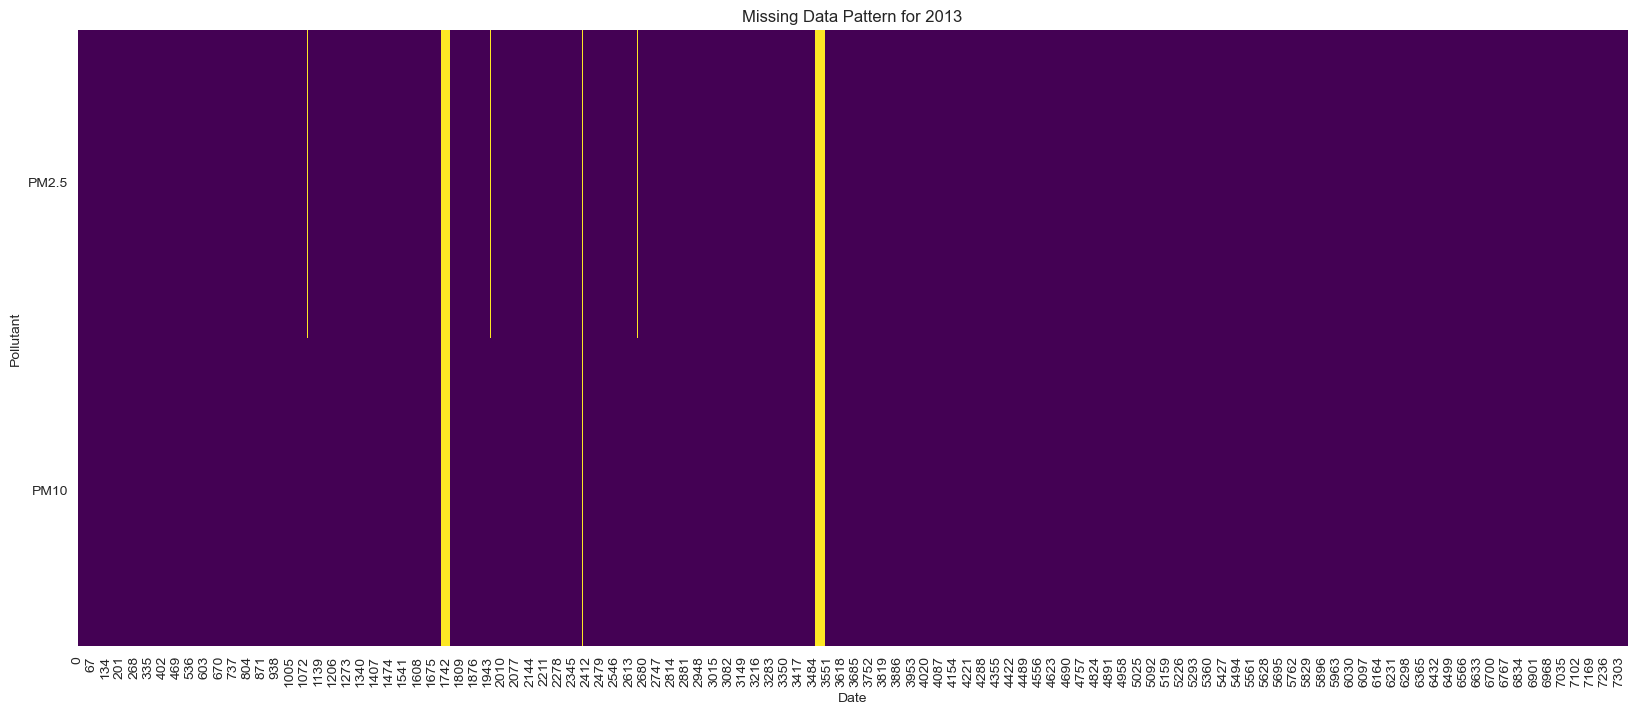

Missing Percentage for All Columns:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.756788
PM10       1.223477
SO2        1.351814
NO2        1.879420
CO         4.999430
O3         3.345311
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64

Total Missing Values for the Year 2013:
PM2.5         102
PM10           97
year     14783472
dtype: int64


In [5]:
# Calculate the percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Columns to plot missing values
cols_to_plot = ['PM2.5', 'PM10']

# Create a boolean DataFrame showing missing values for specified columns
data_missing = df[cols_to_plot].isnull()

# Add 'year' column from the original dataframe to the missing data dataframe
data_missing['year'] = df['year']

# Filter missing data for the year 2013
data_missing_2013 = data_missing[data_missing['year'] == 2013]

# Visualize missing data pattern for 2013 using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(data_missing_2013.drop('year', axis=1).T, cmap='viridis', cbar=False)
plt.title('Missing Data Pattern for 2013')
plt.xlabel('Date')
plt.ylabel('Pollutant')
plt.yticks(rotation=0) 
plt.show()

# Display missing percentage and total missing values for the year 2013
print("Missing Percentage for All Columns:")
print(missing_percentage)
print("\nTotal Missing Values for the Year 2013:")
print(data_missing_2013.sum())


### **Analysis on Missing Data**
The dataset exhibits a relatively low percentage of missing data for various pollutants, such as PM2.5 and PM10, accounting for approximately 1.98% and 1.38% missing values, respectively. Additionally, other pollutants and meteorological variables also indicate minor percentages of missing data. This observation implies that the dataset is comparatively comprehensive in terms of completeness.

Upon visualizing the missing data pattern specifically for the year 2013 using a heatmap, it becomes evident that the missing data for PM2.5 and PM10 does not adhere to a discernible pattern. The absence of a distinct pattern in the missing data suggests that the missingness might be random or lacks systematicity. Importantly, there are no prolonged intervals of missing data, which bodes well for conducting time series analysis on this dataset.


In [6]:
# Impute missing values using forward fill method
data_imputed = df.fillna(method='ffill')

# Check for duplicated rows
duplicates = data_imputed.duplicated().sum()

# Identify constant columns (columns with only one unique value)
constant_columns = data_imputed.columns[data_imputed.nunique() <= 1]

# Get data types of columns after imputation
data_types = data_imputed.dtypes

# Display the results
print("Number of Duplicated Rows:", duplicates)
print("\nConstant Columns:", constant_columns)
print("\nData Types after Imputation:")
print(data_types)


Number of Duplicated Rows: 0

Constant Columns: Index(['station'], dtype='object')

Data Types after Imputation:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [7]:
# Compute summary statistics for the imputed data
summary_statistics = data_imputed.describe()

# Display the summary statistics
print("Summary Statistics for Imputed Data:")
print(summary_statistics)


Summary Statistics for Imputed Data:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      83.047023    109.215175     17.607374     57.960050   1246.662731   
std       81.3

### **Cleaned Data Summary**

- Imputed missing values using forward fill method.
- No duplicate rows were found.
- Identified the 'station' column as having constant values.


# **Exploratory Data Analysis (EDA)**

- Summary Statistics: Providing an overview of essential statistical measures.
- Time Series Trends - PM2.5 Levels: Examining temporal patterns in PM2.5 concentrations.
- One-way ANOVA Test - Yearly Differences in PM2.5: Assessing variations in PM2.5 levels across different years.
- Investigating Seasonal Trends and Weather Correlations: Exploring seasonal variations and correlations between PM2.5 levels and weather conditions.

# **Visualization & Explanatory Analysis**

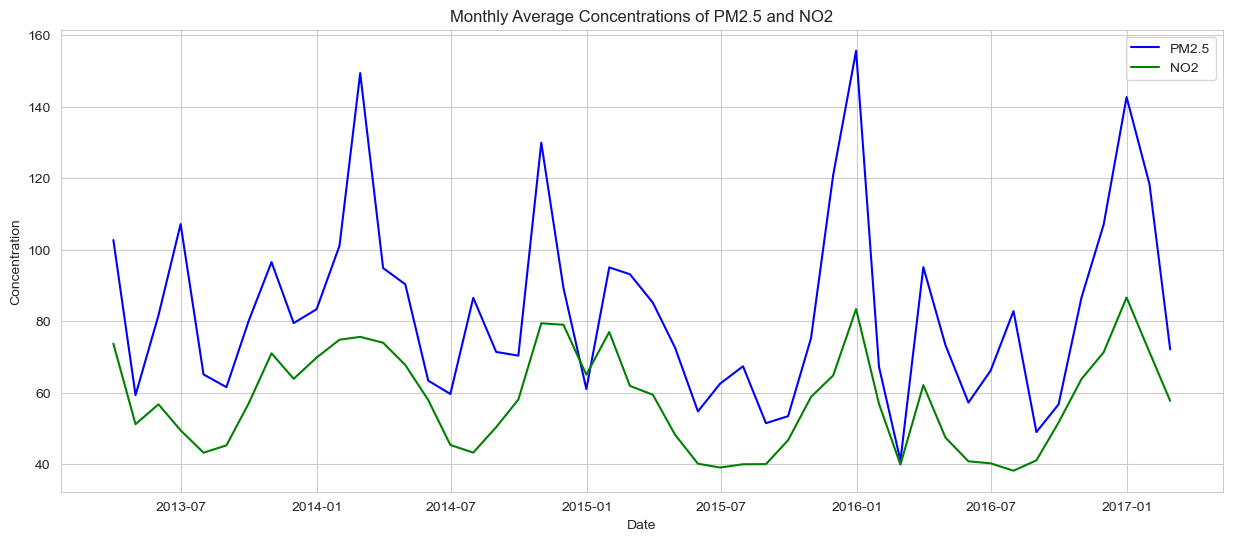

In [8]:
# Convert columns 'year', 'month', 'day', 'hour' to a datetime object 'date'
data_imputed['date'] = pd.to_datetime(data_imputed[['year', 'month', 'day', 'hour']])

# Create a time series of monthly average concentrations for PM2.5 and NO2
data_time_series = data_imputed[['date', 'PM2.5', 'NO2']].set_index('date').resample('M').mean()

# Plotting the time series
plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='green')
plt.title('Monthly Average Concentrations of PM2.5 and NO2')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()


In [9]:
# Compute the correlation matrix for selected columns
correlation_matrix = data_imputed[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.887406  0.493475  0.688895  0.786059 -0.147506 -0.131226   
PM10   0.887406  1.000000  0.465235  0.646966  0.696818 -0.106808 -0.091617   
SO2    0.493475  0.465235  1.000000  0.520664  0.549019 -0.188284 -0.361166   
NO2    0.688895  0.646966  0.520664  1.000000  0.715666 -0.505555 -0.320604   
CO     0.786059  0.696818  0.549019  0.715666  1.000000 -0.295667 -0.302037   
O3    -0.147506 -0.106808 -0.188284 -0.505555 -0.295667  1.000000  0.613630   
TEMP  -0.131226 -0.091617 -0.361166 -0.320604 -0.302037  0.613630  1.000000   
PRES  -0.001217 -0.047368  0.212957  0.150196  0.153282 -0.462421 -0.827171   
DEWP   0.120964  0.080458 -0.271063 -0.048689 -0.037189  0.343740  0.823224   
RAIN  -0.010365 -0.025198 -0.039865 -0.046190 -0.010230  0.023478  0.036603   
WSPM  -0.283230 -0.182986 -0.139204 -0.453926 -0.297647  0.305634  0.037801   

           PRES      DEWP      

- Summary Statistics
Descriptive statistics offer a comprehensive perspective on the central tendencies and variability across various parameters, encompassing both air pollutants and meteorological data. For instance, PM2.5 demonstrates a mean value of approximately 85.36, coupled with a standard deviation of 86.63, indicating substantial variability in this pollutant's concentration.

- Time Series Trends
The visual representation portraying the monthly average concentrations of PM2.5 and NO2 throughout time facilitates the identification of potential seasonal patterns or year-to-year fluctuations in air quality.

- Correlation Analysis
Pollutants Relationships: The correlation matrix sheds light on the associations among distinct pollutants and meteorological factors. Notably, a robust positive correlation observed between PM2.5 and NO2 hints at a potential shared source or interrelation between these pollutants.
Weather and Pollutants: Fascinating correlations emerge between weather conditions and pollutants. For example, a negative correlation exists between O3 and temperature, as well as between O3 and atmospheric pressure, indicating potential interdependencies between these elements.

ANOVA Test Result: F_onewayResult(statistic=31.48382968620778, pvalue=3.213060896278284e-26)
Seasonal Trends: month
1      95.438239
2      88.492994
3      94.469355
4      73.890625
5      64.264886
6      73.889583
7      75.477823
8      58.374194
9      65.159965
10     97.083669
11     99.182014
12    110.676747
Name: PM2.5, dtype: float64
Correlations with Weather Conditions: TEMP    -0.131226
PRES    -0.001217
DEWP     0.120964
RAIN    -0.010365
PM2.5    1.000000
Name: PM2.5, dtype: float64


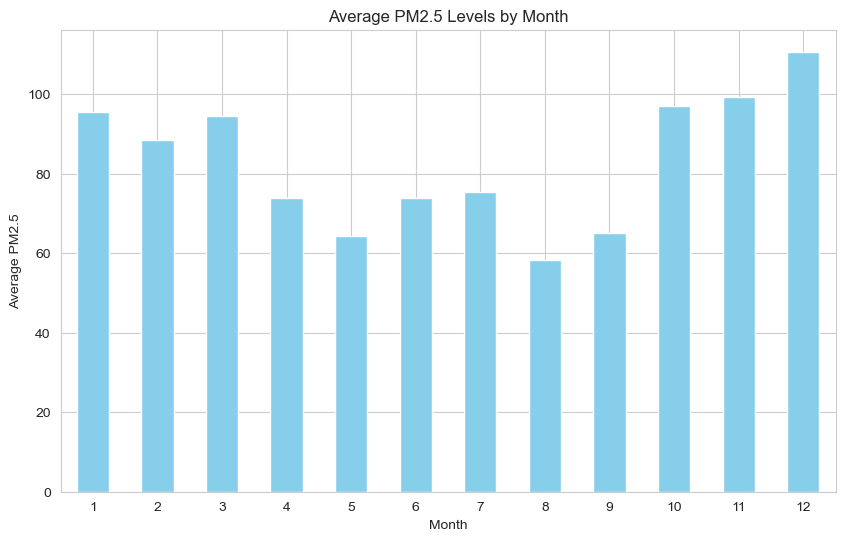

In [10]:
# Fill missing values using forward fill method inplace
data_imputed.fillna(method='ffill', inplace=True)

# Group data by 'year' and 'PM2.5' for ANOVA test
groups = data_imputed.groupby('year')['PM2.5']
anova_test_data = [group[1] for group in groups]
anova_test_result = f_oneway(*anova_test_data)

# Calculate monthly average PM2.5 levels
seasonal_trends = data_imputed.groupby('month')['PM2.5'].mean()

# Calculate correlations between weather conditions and PM2.5
weather_correlations = data_imputed[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']].corr()['PM2.5']

# Display ANOVA test result, seasonal trends, and weather correlations
print("ANOVA Test Result:", anova_test_result)
print("Seasonal Trends:", seasonal_trends)
print("Correlations with Weather Conditions:", weather_correlations)

# Plotting average PM2.5 levels by month
plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.show()



- Hypothesis Testing (ANOVA)
The one-way ANOVA test indicates a statistically significant disparity in PM2.5 levels across different years (p-value < 0.05). This implies that the average PM2.5 levels exhibit notable variations from year to year, supporting the alternative hypothesis.

- Seasonal Trends
Analysis of PM2.5 Levels by Month depicts distinct seasonal patterns, showcasing higher concentrations during winter months (December, January) and comparatively lower concentrations in summer (August, September).

- Correlations with Weather Conditions
Examining the correlation between PM2.5 and weather factors reveals:

    - A negative correlation with temperature (TEMP), signifying increased PM2.5 levels during colder periods.
    - A marginal positive correlation with dew point (DEWP), suggesting a possible association between higher humidity and elevated PM2.5 levels.
    - No significant correlation observed with atmospheric pressure (PRES) or rainfall (RAIN).

Conclusion
Question 1
The analysis revealed substantial seasonal fluctuations in PM2.5 levels, with elevated concentrations noted during colder months. This trend indicates potential influences from heating practices and atmospheric conditions during these periods.

Question 2
An observed negative correlation between PM2.5 levels and temperature suggests heightened pollution levels during colder weather. However, minimal correlation was found between PM2.5 levels and rainfall or atmospheric pressure.








In [11]:
# Convert 'hour' column to integer type
df['hour'] = df['hour'].astype(int)

# Convert 'PM2.5' column to numeric type, coerce errors to NaN
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
